<a href="https://colab.research.google.com/github/Otavio8888/econometric_tests/blob/test4/EA05_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometria Aplicada [Módulo em Python]
### OLS - Propriedades assintóticas

In [ ]:
!pip install wooldridge

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as woo
np.random.seed(2021)

## Introdução        

Neste seção iremos utilizar as chamadas Simulações de Monte Carlo para estudar algumas propriedades assintóticas do estimador OLS. Por "propriedades assintóticas" estamos nos referindo às propriedades que os estimadores do método de mínimos quadrados ordinários quando a amostra tende ao infinito.

Em situações com amostras pequenas, o estimador OLS apenas tem parâmetros com distribuição normal se o termo de erro também tiver distribuição normal e nós condicionarmos por regressores. Entretanto, no mundo assintótico, não são necessários esses requisitos.

### Simulação de Monte Carlo

As simulação de Monte Carlo é um método que visa utilizar grandes amostragens para demonstrar resultados de forma probabilística. Assim, no nosso caso específico, iremos analisar como variações na amostra impactam a distribuição dos parâmetros estimados em três diferentes casos. No primeiro, mostraremos que se os erros forem normais, a distribuição do parâmetro será normal, independente da amostra. No segundo, com termos de erro não normais, a normalidade do parâmetros só se da quando a amostra é grande. De forma semelhante, no último iremos demonstrar que se não condicionarmos pelos regressores, a normalidade também dependerá da amostra.


## Erros normais

Em todos os exemplos utilizaremos 5 mil repetições (ou seja, 5 mil amostras) de uma regressão em que o parâmetro $\beta_{1}$ é igual a 2 e o $\beta_{0}$ é igual a 1. Assim, iremos estimar 5 mil regressões para cada tamanho de amostra (5,10,100,1000) com o tamanho indicado. Nessas regressões o X (regressor) irá ser mantido fixo. A diferença entre elas será o termo de erro, que cada vezes será diferente, o que também mudará o Y. Assim, iremos calcular a densidade dos parâmetros estimados e comparar com uma distribuição normal com a mesma média e desvio padrão. Neste primeiro caso, o termo de erro tem uma distribuição normal.

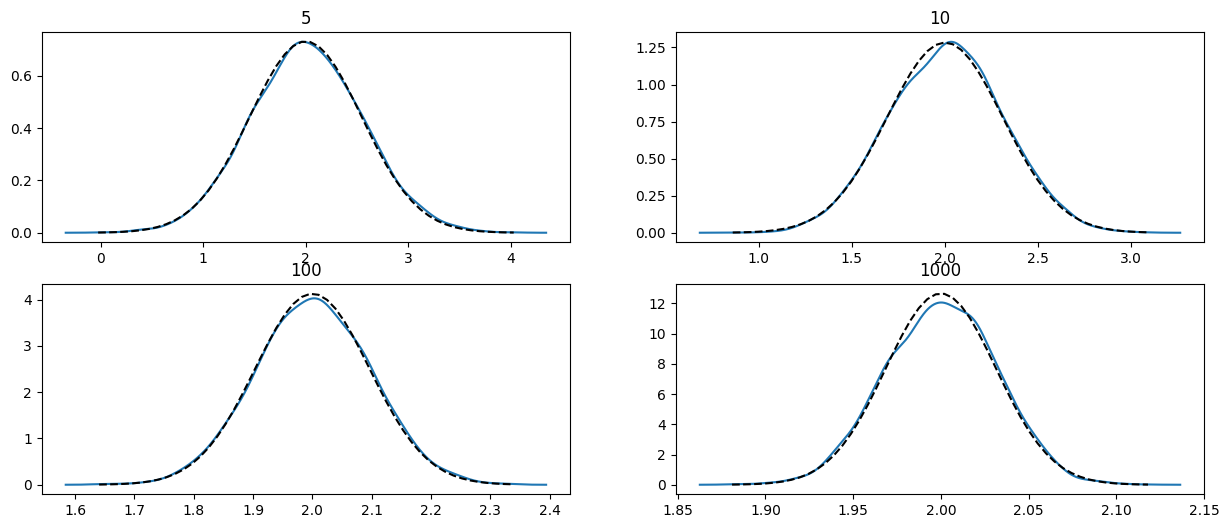

In [ ]:
# Tamanho da amostra e número de simulações
n = [5, 10, 100, 1000]
r = 5000

# Parâmetros reais
beta0 = 1
beta1 = 2

#desvio de x
sx = 1
#media de x
ex = 4

fig, axs = plt.subplots(2,2, figsize=(15, 6))
axs = axs.ravel()

#índice do gráfico
c = 0


for j in n:

    # amostra de x, fixada sobre as replicações:
    x = stats.norm.rvs(ex, sx, size=j)

    b1 = np.empty(r)

    # repetir r vezes:
    for i in range(r):

        # componente de erro:
        u = stats.norm.rvs(0, 1, size=j)
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({'y': y, 'x': x})

        # OLS:
        reg = smf.ols(formula='y ~ x', data=df)
        results = reg.fit()
        b1[i] = results.params['x']

    # densidade do beta
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()

    # distribuição normal
    X = pd.DataFrame({'const': 1, 'x': x})
    Vbhat = sx * np.linalg.inv(X.T @ X)
    se = np.sqrt(np.diagonal(Vbhat))
    x_range = np.linspace(min(b1), max(b1))
    y = stats.norm.pdf(x_range, beta1, se[1])

    # gráficos:

    axs[c].plot(kde.support, kde.density)
    axs[c].plot(x_range, y, linestyle='--', color='black', label='normal distribution')
    axs[c].set_title(j)

    c=c+1

Veja que a distribuição dos parâmetros é normal, independente do tamanho amostral. Entretanto, quando olhamos a escala do eixo x, percebemos que a diferença entre as amostras é a variância. Quanto maior a amostra, menor a variância.

## Erros não normais

Agora, iremos reaplicar praticamente o mesmo exemplo anterior. A única diferença será em relação à distribuição do termo de erro que estaremos aplicando. Ao invés de distribuídos normalmente, agora os erros tem distribuição exponencial. Essa distribuição é consideravelmente diferente da normal, mas ambas têm média 0 e variância igual a 1.

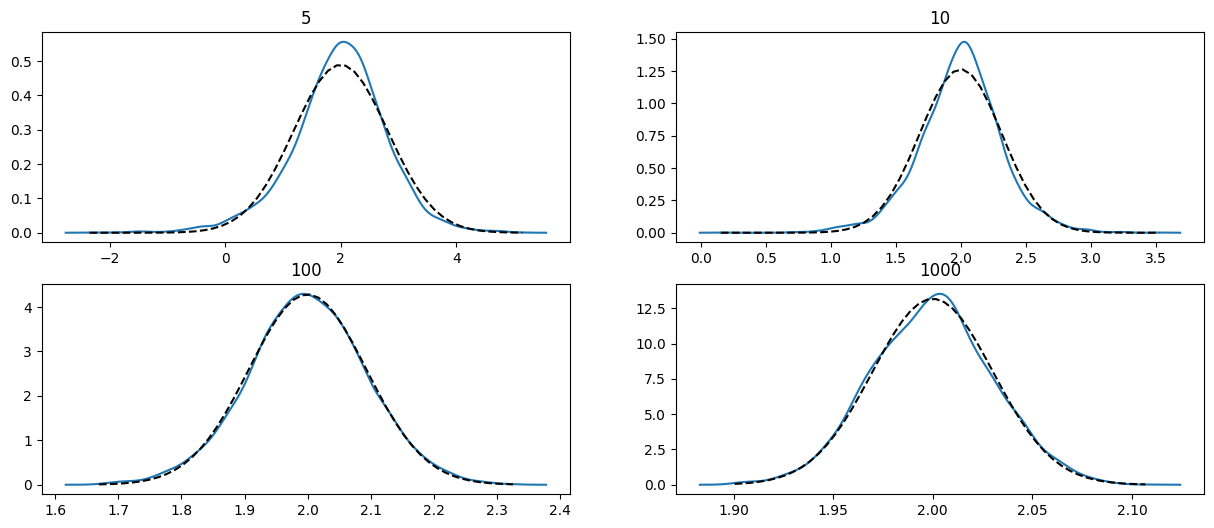

In [ ]:
# Tamanho da amostrs e número de simulações
n = [5, 10, 100, 1000]
r = 5000

# Parâmetros reais
beta0 = 1
beta1 = 2
sx = 1
ex = 4

fig, axs = plt.subplots(2,2, figsize=(15, 6))
axs = axs.ravel()

c = 0

for j in n:


    # amostra de x, fixada sobre as replicações:
    x = stats.norm.rvs(ex, sx, size=j)

    b1 = np.empty(r)

    # repetir r vezes:
    for i in range(r):

        # componente de erro com distribuição exponencial:
        u = stats.expon.rvs(0, 1,size=j)      ###### Única diferença em relação a anterior
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({'y': y, 'x': x})

        # OLS:
        reg = smf.ols(formula='y ~ x', data=df)
        results = reg.fit()
        b1[i] = results.params['x']
    # densidade
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()
    # distribuição normal
    X = pd.DataFrame({'const': 1, 'x': x})
    Vbhat = sx * np.linalg.inv(X.T @ X)
    se = np.sqrt(np.diagonal(Vbhat))
    x_range = np.linspace(min(b1), max(b1))
    y = stats.norm.pdf(x_range, beta1, se[1])

    # gráficos:

    axs[c].plot(kde.support, kde.density)
    axs[c].plot(x_range, y, linestyle='--', color='black', label='normal distribution')
    axs[c].set_title(j)

    c=c+1

Veja que agora as simulações de regressões com amostras de 5 e 10 não apresenta uma distribuição normal. Já nas amostras de 100 e 1000 ainda há alguma diferença, mas não substancial. O tamanho amostral necessário para termos normalidade nos parâmetros depende do grau de não-normalidade do termo de erro. Se a violação não for tão forte, normalmente se utiliza uma regra de bolso de n = 30. Ou seja, quando se trabalha com grandes amostras, essa não é uma hipótese a se preocupar.

## Regressores não fixos

Agora iremos fazer outro desvio em relação à simulação original. Perceba que a variável X está sendo definida fora do loop. Ou seja, ela é fixa durante todo o exercício. Na maioria dos casos, isso é uma hipótese irrealística da obtenção dos dados. Agora iremos colocar esta linha do código dentro do loop. Portanto, para cada regressão haverá um X diferente.

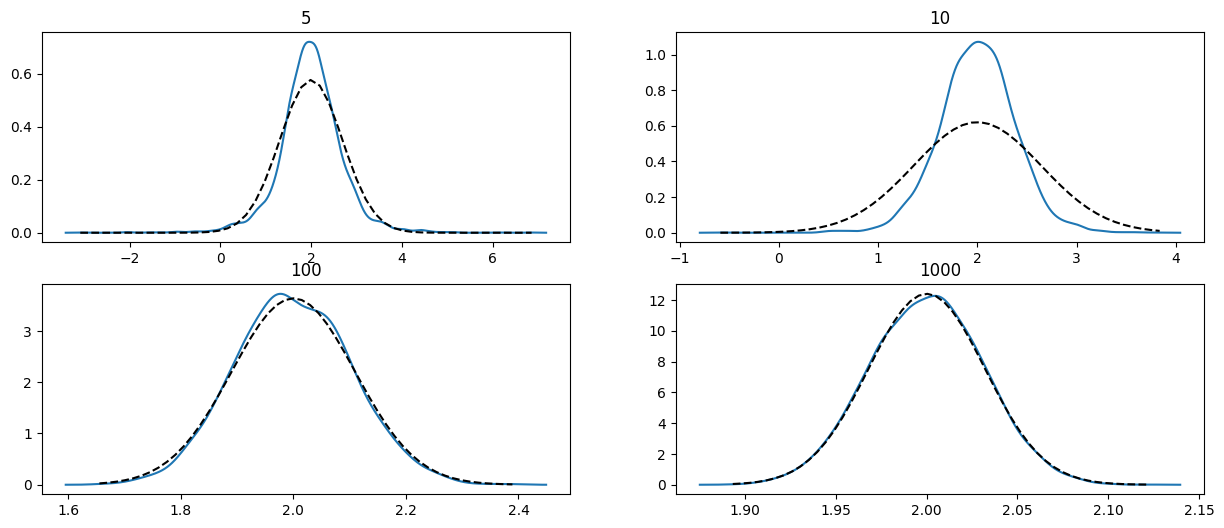

In [ ]:
# Tamanho da amostrs e número de simulações
n = [5, 10, 100, 1000]
r = 5000

# Parâmetros reais
beta0 = 1
beta1 = 2
sx = 1
ex = 4

fig, axs = plt.subplots(2,2, figsize=(15, 6))
axs = axs.ravel()


c = 0

for j in n:

    b1 = np.empty(r)
    # repetir r vezes:
    for i in range(r):

        # amostra de x, não fixada sobre as replicações:
        x = stats.norm.rvs(ex, sx, size=j)

        # componente de erro:
        u = stats.norm.rvs(0, 1, size=j)
        y = beta0 + beta1 * x + u
        df = pd.DataFrame({'y': y, 'x': x})

        # OLS:
        reg = smf.ols(formula='y ~ x', data=df)
        results = reg.fit()
        b1[i] = results.params['x']

    # densidade
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()

    # distribuição normal
    X = pd.DataFrame({'const': 1, 'x': x})
    Vbhat = sx * np.linalg.inv(X.T @ X)
    se = np.sqrt(np.diagonal(Vbhat))
    x_range = np.linspace(min(b1), max(b1))
    y = stats.norm.pdf(x_range, beta1, se[1])

    # gráficos:

    axs[c].plot(kde.support, kde.density)
    axs[c].plot(x_range, y, linestyle='--', color='black', label='normal distribution')
    axs[c].set_title(j)

    c=c+1

De forma semelhante ao exercício anterior, a distribuição apenas se torna mais próxima à normal em amostras grandes.